<a href="https://colab.research.google.com/github/ItsMeAvan/ItsMeAvan/blob/main/KNN_Neev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
boston=pd.read_csv(r'https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Boston.csv')

In [5]:
iris=pd.read_csv(r'https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/IRIS.csv')

In [6]:
boston.head(5)

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [7]:
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#BOSTON

In [8]:
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [9]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NX       506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [10]:
X=boston.drop(['MEDV'],axis=1)

In [11]:
y=boston['MEDV']

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=1)

In [13]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((354, 13), (152, 13), (354,), (152,))

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
ss=StandardScaler()

In [16]:
X_train=ss.fit_transform(X_train)

In [17]:
X_test=ss.fit_transform(X_test)

In [18]:
from sklearn.neighbors import KNeighborsRegressor

In [19]:
knnreg=KNeighborsRegressor()

In [20]:
knnreg.fit(X_train,y_train)

KNeighborsRegressor()

In [21]:
y_pred=knnreg.predict(X_test)

In [22]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error

In [23]:
mean_absolute_error(y_test,y_pred)

2.910657894736842

In [24]:
mean_absolute_percentage_error(y_test,y_pred)

0.1283247389421598

In [25]:
error_rate=[]
for i in range(1,40):
  knn=KNeighborsRegressor(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i=knn.predict(X_test)
  error_rate.append(mean_absolute_error(y_test,pred_i))


In [26]:
error_rate

[2.7276315789473684,
 2.902302631578947,
 2.9671052631578947,
 3.0034539473684214,
 2.910657894736842,
 2.9816885964912276,
 3.032894736842105,
 3.075657894736842,
 3.0864035087719293,
 3.1517763157894736,
 3.1660885167464117,
 3.2322916666666663,
 3.1924595141700403,
 3.233364661654135,
 3.255,
 3.2868009868421053,
 3.2888157894736842,
 3.3131578947368423,
 3.346883656509695,
 3.347236842105263,
 3.390068922305765,
 3.4511363636363646,
 3.4462814645308923,
 3.4632401315789476,
 3.486236842105263,
 3.535475708502024,
 3.530019493177388,
 3.564121240601504,
 3.613248638838476,
 3.6401535087719297,
 3.6817487266553486,
 3.7199013157894734,
 3.742244816586922,
 3.7775928792569657,
 3.8056015037593984,
 3.8638523391812867,
 3.8719416785206255,
 3.9071329639889187,
 3.9235155195681513]

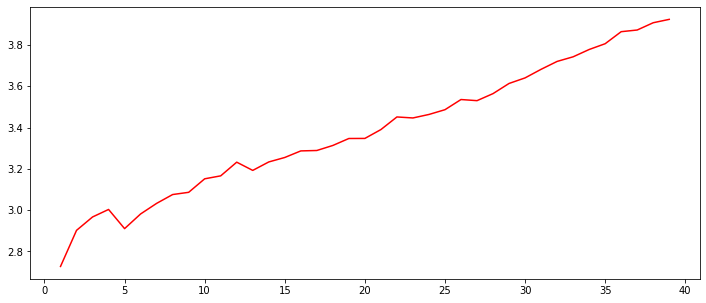

In [28]:
 fig,ax=plt.subplots(figsize=(12,5))
 ax.plot(range(1,40),error_rate,color='red')
 plt.show()

#IRIS

In [29]:
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [30]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [31]:
X=iris.drop(['species'],axis=1)

In [32]:
y=iris['species']

In [33]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [35]:
y


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=.7,random_state=1)

In [38]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((105, 4), (45, 4), (105,), (45,))

In [39]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [40]:
X_train=ss.fit_transform(X_train)

In [41]:
X_test=ss.fit_transform(X_test)

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [66]:
knc=KNeighborsClassifier(n_neighbors=6)

In [67]:
knc.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [68]:
y_pred=knc.predict(X_test)

In [69]:
from sklearn.metrics import classification_report,confusion_matrix

In [70]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [71]:
print(confusion_matrix(y_test,y_pred))

[[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]


In [53]:
arr=[]

for i in range(1,50):
  knc=KNeighborsClassifier(n_neighbors=i)
  knc.fit(X_train,y_train)
  pred_i=knc.predict(X_test)
  arr.append(mean_absolute_error(y_test,pred_i))

In [54]:
arr

[0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.08888888888888889,
 0.044444444444444446,
 0.06666666666666667,
 0.044444444444444446,
 0.06666666666666667,
 0.044444444444444446,
 0.044444444444444446,
 0.044444444444444446,
 0.06666666666666667,
 0.044444444444444446,
 0.044444444444444446,
 0.044444444444444446,
 0.044444444444444446,
 0.044444444444444446,
 0.044444444444444446,
 0.044444444444444446,
 0.044444444444444446,
 0.044444444444444446,
 0.044444444444444446,
 0.044444444444444446,
 0.044444444444444446,
 0.044444444444444446,
 0.044444444444444446,
 0.044444444444444446,
 0.044444444444444446,
 0.044444444444444446,
 0.06666666666666667,
 0.044444444444444446,
 0.044444444444444446,
 0.044444444444444446,
 0.044444444444444446,
 0.06666666666666667,
 0.06666666666666667,
 0.08888888888888889,
 0.1111111111111111,
 0.08888888888888889,
 0.1111111111111111,
 0.1111111111111111,
 0.1111111111111111,
 0.1111111111111111,
 0.13333333

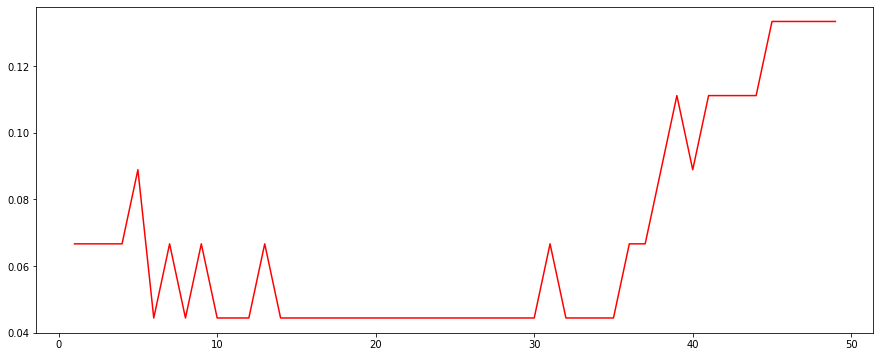

In [65]:
fig,ax=plt.subplots(figsize=(15,6))
ax.plot(range(1,50),arr,color='red')
plt.show()